In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [15]:
path = 'vgsales.csv'
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [23]:

df_final =df[['Platform', 'EU_Sales','JP_Sales', 'Other_Sales','Global_Sales']]

In [24]:
df2 =df_final._get_numeric_data()
df2.head()

,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,29.02,3.77,8.46,82.74
1,3.58,6.81,0.77,40.24
2,12.88,3.79,3.31,35.82
3,11.01,3.28,2.96,33.00
4,8.89,10.22,1.00,31.37


In [31]:
features = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
target = ['Platform']

In [32]:
#Se estandariza las caracteristicas del conjunto de datos en la escala de unidades media = 0 y varianza = 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[features]),
                 columns=features)
df_sc.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1.000000,1.000000,0.368885,0.800378,1.000000
1,0.700892,0.123363,0.666341,0.072848,0.486281
2,0.382020,0.443832,0.370841,0.313150,0.432854
3,0.379610,0.379394,0.320939,0.280038,0.398767
4,0.271632,0.306340,1.000000,0.094607,0.379064


In [33]:
#Remplazar Na por 0
df.fillna(0, inplace = True)

In [34]:
pca = PCA()

df_pca = pd.DataFrame(pca.fit_transform(df[features]),columns=features)

df_pca.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,96.515811,0.214632,7.699348,-0.473687,-0.002705
1,48.053942,9.807926,-7.635834,-0.752155,-0.001218
2,40.790695,-2.523541,1.943686,-0.541820,0.003428
3,37.781626,-0.972111,1.347627,-0.383180,-0.000963
4,34.470937,-5.843745,-5.236192,-1.472549,0.003699


In [35]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.44392173e-01, 2.93720002e-02, 2.13387123e-02, 4.89554342e-03,
       1.57098782e-06])

In [37]:
df_pca['target'] = df[target]
df_pca.columns = ['PC1', 'PC2','PC3','PC4','PC5','Platform']
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,Platform
0,96.515811,0.214632,7.699348,-0.473687,-0.002705,Wii
1,48.053942,9.807926,-7.635834,-0.752155,-0.001218,NES
2,40.790695,-2.523541,1.943686,-0.541820,0.003428,Wii
3,37.781626,-0.972111,1.347627,-0.383180,-0.000963,Wii
4,34.470937,-5.843745,-5.236192,-1.472549,0.003699,GB


In [40]:
df.Platform.value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

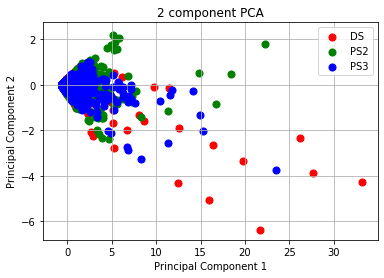

In [55]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = ['DS'
,'PS2'
,'PS3'
,'Wii'
,'X360'
,'PSP'
,'PS'
,'PC' 
,'XB' 
,'GBA'
,'GC' 
,'3DS'
,'PSV'      
,'PS4'      
,'N64'      
,'SNES'     
,'XOne'    
,'SAT'      
,'WiiU'     
,'2600'     
,'NES'      
,'GB'        
,'DC'        
,'GEN'       
,'NG'        
,'SCD'       
,'WS'        
,'3DO'       
,'TG16'      
,'PCFX'      
,'GG'  ]
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):   
    indicesToKeep = df_pca['Platform'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1']
    , df_pca.loc[indicesToKeep, 'PC2']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()
